In [1]:
import pandas as pd
import numpy as np

In [362]:
import copy

In [2]:
import random 

In [3]:
df = pd.read_csv("15-Points.csv")

In [4]:
df.head()

,x,y,City
0,5.500000e-08,9.860000e-09,1
1,-2.887330e+01,-7.980000e-08,2
2,-7.929160e+01,-2.140330e+01,3
3,-1.465770e+01,-4.338960e+01,4
4,-6.474730e+01,2.189820e+01,5


In [5]:
class City:
    def __init__(self,name,x,y):
        self.Name = name
        self.X_coor = x
        self.Y_coor = y
    def __repr__(self):
        return f'{self.Name}'

In [6]:
def Model_problem(d):
    data = []
    for row in d.index:
        city = City(df.iloc[row,2],df.iloc[row,0],df.iloc[row,1])
        data.append(city)
    return data

In [125]:
class Chromosome:
    def __init__(self,data_list):
        self.data = data_list
        cost = 0
        i = 0
        while i < len(self.data)-1:
            cost += np.sqrt((data_list[i].X_coor - data_list[i+1].X_coor)**2 + (data_list[i].Y_coor - data_list[i+1].Y_coor)**2)
            i += 1
        cost += np.sqrt((data_list[0].X_coor - data_list[-1].X_coor)**2 + (data_list[0].Y_coor - data_list[-1].Y_coor)**2)
        self.Cost = cost
        self.Fitness = 1/cost 
    def __repr__(self):
        return f'{self.data}'

In [127]:
def Init_population(data_list,size):
    chromosomes = []
    for i in range(size):
        genes = data_list[:]
        random.shuffle(genes)
        chromosomes.append(Chromosome(genes))
    return chromosomes

In [383]:
def Elitism(pops,numOfItems):
    pops_sorted = sorted(pops,key = lambda x:x.Fitness,reverse=True)
    return pops_sorted,numOfItems

In [384]:
def tournment(chromosomes,size):
        randomRow = np.random.randint(0,size, size=1)
        p = chromosomes[randomRow[0]]
        #p2 = chromosomes[randomRow[1]]
        return p

In [385]:
def PMC(p1,p2,ind1,ind2):
            child1 = copy.deepcopy(p1).data
            child2 = copy.deepcopy(p2).data
            for c in range(ind1,ind2-1):
                if child1[c] in child2:
                    ind_c = child2.index(child1[c])
                    child2[ind_c] = child2[c]
                    child2[c] = child1[c]
                    
            for c in range(ind1,ind2-1):
                if child2[c] in child1:
                    ind_c = child1.index(child2[c])
                    child1[ind_c] = child1[c]
                    child1[c] = child2[c]
            child1 = Chromosome(child1)
            child2 = Chromosome(child2)
            return child1,child2

In [415]:
def CrossOver(size,elite,chromosomes,prob,new_pop,length):
    for _ in range((len(chromosomes[elite+1:])//2)+1):
        p1 = tournment(chromosomes,size)
        p2 = tournment(chromosomes,size)
        rand = np.round(np.random.random(),2)
        
        if rand > prob:
            new_pop.append(p1)
            new_pop.append(p2)
            
        else:
            ind1 = np.random.randint(low = 0,high = length-1)  
            ind2 = np.random.randint(low = 0,high = length-1) 
            while ind2 == ind1:
                ind2 = np.random.randint(low = 0,high = length-1)
                
            ch1,ch2 = PMC(p1,p2,ind1,ind2)
            new_pop.append(ch1)
            new_pop.append(ch2)

In [416]:
def Mutation(new_pop,elite,prob_M,length):
    for p in new_pop[elite:]:
        pp = p.data
        rand = np.round(np.random.random(),2)
        if rand < prob_M:
            ind1 = np.random.randint(low = 0,high = length -1)  
            ind2 = np.random.randint(low = 0,high = length -1)
            while ind2 == ind1:
                        ind2 = np.random.randint(low = 0,high = length-1)
            pp[ind1],pp[ind2] = pp[ind2],pp[ind1] 
         

In [596]:
def GA(data,size,cross_over_prob,mutation_prob,elite_items,length):
    out = []
    popp = Init_population(data,size)
    out.append(popp)
    #print(len(popp[0]))
    for _ in range(200):
        new_population = []
        #print(len(popp))
        p_sorted,elite = Elitism(popp,elite_items)
        #print(l)
        for p in p_sorted[0:elite]:
            new_population.append(p)
        #print(p_sorted)
        CrossOver(size,elite,p_sorted,cross_over_prob,new_population,length)
        Mutation(new_population,elite,mutation_prob,length)
        popp = copy.deepcopy(new_population)
        out.append(popp)
        #print(popp)
        #print('-----------------------------------------')
        
    return out

In [631]:
out = GA(data,350,0.7,0.3,150,15)

In [632]:
out[-1][0].Cost

284.3810904080332

In [546]:
import matplotlib.pyplot as plt

In [788]:
result = out[-1][7]

In [789]:
result

[1, 13, 2, 15, 7, 5, 3, 9, 12, 14, 10, 8, 6, 4, 11]

In [790]:
result.Cost

284.3810904080332

In [791]:
x = []
y = []
for city in result.data:
    x.append(city.X_coor)
    y.append(city.Y_coor)

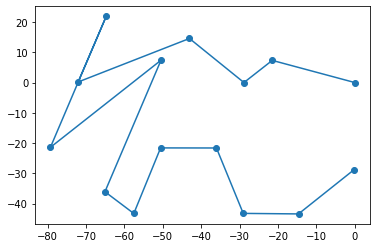

In [792]:
plt.plot(x,y,'-o')

In [672]:
result.Cost

284.3810904080332

In [793]:
r = out[-1][50]

In [794]:
r

[5, 3, 9, 12, 7, 8, 15, 14, 6, 2, 10, 4, 13, 1, 11]

In [795]:
r.Cost

284.3810904080332

In [796]:
h = []
k = []
for city in r.data:
    h.append(city.X_coor)
    k.append(city.Y_coor)

In [ ]:
plt.plot(x,y,'-o')